<h2> Prerequisite </h2>
- pip install torch    

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [81]:
df = pd.read_csv("/Users/keremsmacbook/DataspellProjects/MultivariateForecasting/Data/Crypto.csv")

In [82]:
df.head(2)

,Unnamed: 0,Date,bitcoin_Price,ethereum_Price,avax_Price,binance_Price,doge_Price,cardano_Price,polkadot_Price,ripple_Price,solana_Price,tron_Price
0,0,2023-12-25 00:00:00 UTC+0,43621.237697,2272.949384,48.298842,267.152891,0.094472,0.625149,9.210169,0.646002,120.937582,0.105882
1,1,2023-12-24 00:00:00 UTC+0,43058.521704,2268.370864,47.982728,264.894649,0.091928,0.593517,8.649198,0.613854,112.642132,0.106460


In [83]:
df['Date'] = df['Date'].str.replace(' UTC', '')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z')
df.set_index('Date', inplace=True)

In [84]:
df.shape

(1089, 11)

In [85]:
df.head(10)

,Unnamed: 0,bitcoin_Price,ethereum_Price,avax_Price,binance_Price,doge_Price,cardano_Price,polkadot_Price,ripple_Price,solana_Price,tron_Price
Date,,,,,,,,,,,
2023-12-25 00:00:00+00:00,0,43621.237697,2272.949384,48.298842,267.152891,0.094472,0.625149,9.210169,0.646002,120.937582,0.105882
2023-12-24 00:00:00+00:00,1,43058.521704,2268.370864,47.982728,264.894649,0.091928,0.593517,8.649198,0.613854,112.642132,0.106460
2023-12-23 00:00:00+00:00,2,43783.239603,2312.957281,48.155064,271.591529,0.093645,0.614550,8.332853,0.620245,108.092274,0.106865
2023-12-22 00:00:00+00:00,3,44021.347627,2328.084867,45.468036,271.487518,0.095322,0.623957,7.978560,0.625628,98.076259,0.105204
2023-12-21 00:00:00+00:00,4,43855.294074,2238.018423,46.050435,271.445952,0.094995,0.636154,8.343146,0.623467,93.901695,0.104655
2023-12-20 00:00:00+00:00,5,43637.571325,2199.705986,43.433527,260.168629,0.091417,0.589006,6.941014,0.616860,82.169887,0.102694
2023-12-19 00:00:00+00:00,6,42275.503840,2177.727320,39.791542,252.051420,0.090191,0.575898,6.710684,0.604835,72.751983,0.100546
2023-12-18 00:00:00+00:00,7,42632.732664,2216.921088,41.082502,241.281920,0.092002,0.600966,6.876500,0.612367,74.357978,0.100896
2023-12-17 00:00:00+00:00,8,41411.574489,2197.782227,40.678957,239.032809,0.092960,0.580505,6.789950,0.610150,71.107822,0.102039


In [86]:
df.drop("Unnamed: 0", inplace = True, axis=1)

In [87]:
df.head(10)

,bitcoin_Price,ethereum_Price,avax_Price,binance_Price,doge_Price,cardano_Price,polkadot_Price,ripple_Price,solana_Price,tron_Price
Date,,,,,,,,,,
2023-12-25 00:00:00+00:00,43621.237697,2272.949384,48.298842,267.152891,0.094472,0.625149,9.210169,0.646002,120.937582,0.105882
2023-12-24 00:00:00+00:00,43058.521704,2268.370864,47.982728,264.894649,0.091928,0.593517,8.649198,0.613854,112.642132,0.106460
2023-12-23 00:00:00+00:00,43783.239603,2312.957281,48.155064,271.591529,0.093645,0.614550,8.332853,0.620245,108.092274,0.106865
2023-12-22 00:00:00+00:00,44021.347627,2328.084867,45.468036,271.487518,0.095322,0.623957,7.978560,0.625628,98.076259,0.105204
2023-12-21 00:00:00+00:00,43855.294074,2238.018423,46.050435,271.445952,0.094995,0.636154,8.343146,0.623467,93.901695,0.104655
2023-12-20 00:00:00+00:00,43637.571325,2199.705986,43.433527,260.168629,0.091417,0.589006,6.941014,0.616860,82.169887,0.102694
2023-12-19 00:00:00+00:00,42275.503840,2177.727320,39.791542,252.051420,0.090191,0.575898,6.710684,0.604835,72.751983,0.100546
2023-12-18 00:00:00+00:00,42632.732664,2216.921088,41.082502,241.281920,0.092002,0.600966,6.876500,0.612367,74.357978,0.100896
2023-12-17 00:00:00+00:00,41411.574489,2197.782227,40.678957,239.032809,0.092960,0.580505,6.789950,0.610150,71.107822,0.102039


In [88]:
scaler = MinMaxScaler(feature_range=(-1, 1))
all_data_normalized = []

In [89]:
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, layer_size=64, output_size=None):
        super(NBeatsBlock, self).__init__()
        self.fc1 = nn.Linear(input_size, layer_size)
        self.fc2 = nn.Linear(layer_size, layer_size)
        self.fc3 = nn.Linear(layer_size, layer_size)
        self.fc4 = nn.Linear(layer_size, output_size if output_size is not None else input_size)
        self.output_size = output_size if output_size is not None else input_size

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        forecast = self.fc4(x)
        backcast = x[:, :self.output_size]
        return backcast, forecast

class NBeatsNet(nn.Module):
    def __init__(self, input_size, forecast_length, stack_types=[1, 1], nb_blocks_per_stack=4, layer_size=64, thetas_dim=[4, 8], share_weights_in_stack=False):
        super(NBeatsNet, self).__init__()
        self.input_size = input_size
        self.forecast_length = forecast_length
        self.stack_types = stack_types
        self.nb_blocks_per_stack = nb_blocks_per_stack

        blocks = []
        for stack_id in range(len(stack_types)):
            for block_id in range(nb_blocks_per_stack):
                block_init = NBeatsBlock(input_size=input_size, layer_size=layer_size, output_size=forecast_length) # Adjusted to use 'input_size'
                blocks.append(block_init)
        self.blocks = nn.ModuleList(blocks)

    def forward(self, x):
        forecast = torch.zeros(x.size(0), self.forecast_length, device=x.device)  # Adjusted to properly initialize the forecast tensor
        for block in self.blocks:
            backcast, block_forecast = block(x.view(x.size(0), -1))
            forecast += block_forecast.view(forecast.size())
        return forecast

In [90]:
def create_sequences(data, sequence_length, label):
    X, y, labels = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
        labels.append(label)
    return np.array(X), np.array(y), np.array(labels)

In [91]:
sequence_length = 30
test_size = 0.2
validation_fraction = 0.1  

X_train_combined, y_train_combined, labels_train_combined = [], [], []
X_val_combined, y_val_combined, labels_val_combined = [], [], []
X_test_combined, y_test_combined, labels_test_combined = [], [], []

def create_sequences(data, sequence_length, label):
    X, y, labels = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
        labels.append(label)
    return np.array(X), np.array(y), np.array(labels)

for idx, company in enumerate(df.columns):
    company_data = df[company].dropna().values.reshape(-1, 1)  

    scaler = MinMaxScaler(feature_range=(-1, 1))
    normalized_data = scaler.fit_transform(company_data)

    if len(normalized_data) <= sequence_length:
        print(f"Skipping {company}: Not enough data for sequence creation.")
        continue

    train_size = int(len(normalized_data) * (1 - test_size))
    train_data = normalized_data[:train_size]
    test_data = normalized_data[train_size - sequence_length:]  

    X_test_tmp, y_test_tmp, labels_test_tmp = create_sequences(test_data, sequence_length, idx)
    X_test_combined.extend(X_test_tmp)
    y_test_combined.extend(y_test_tmp)
    labels_test_combined.extend(labels_test_tmp)

    tscv = TimeSeriesSplit(n_splits=int(1 / validation_fraction))

    for train_idx, val_idx in tscv.split(train_data):
        X_train_tmp, y_train_tmp, labels_train_tmp = create_sequences(train_data[train_idx], sequence_length, idx)
        X_val_tmp, y_val_tmp, labels_val_tmp = create_sequences(train_data[val_idx], sequence_length, idx)

        X_train_combined.extend(X_train_tmp)
        y_train_combined.extend(y_train_tmp)
        labels_train_combined.extend(labels_train_tmp)

        X_val_combined.extend(X_val_tmp)
        y_val_combined.extend(y_val_tmp)
        labels_val_combined.extend(labels_val_tmp)

# Convert lists to numpy arrays
X_train_combined = np.array(X_train_combined)
y_train_combined = np.array(y_train_combined).reshape(-1, 1)
labels_train_combined = np.array(labels_train_combined)

X_val_combined = np.array(X_val_combined)
y_val_combined = np.array(y_val_combined).reshape(-1, 1)
labels_val_combined = np.array(labels_val_combined)

X_test_combined = np.array(X_test_combined)
y_test_combined = np.array(y_test_combined).reshape(-1, 1)
labels_test_combined = np.array(labels_test_combined)

# Print the shapes
print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"y_train_combined shape: {y_train_combined.shape}")
print(f"labels_train_combined shape: {labels_train_combined.shape}")
print(f"X_val_combined shape: {X_val_combined.shape}")
print(f"y_val_combined shape: {y_val_combined.shape}")
print(f"labels_val_combined shape: {labels_val_combined.shape}")
print(f"X_test_combined shape: {X_test_combined.shape}")
print(f"y_test_combined shape: {y_test_combined.shape}")
print(f"labels_test_combined shape: {labels_test_combined.shape}")

X_train_combined shape: (40650, 30, 1)
y_train_combined shape: (40650, 1)
labels_train_combined shape: (40650,)
X_val_combined shape: (4900, 30, 1)
y_val_combined shape: (4900, 1)
labels_val_combined shape: (4900,)
X_test_combined shape: (2180, 30, 1)
y_test_combined shape: (2180, 1)
labels_test_combined shape: (2180,)


In [93]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

def batch_convert_to_tensor(data, batch_size=1000, dtype=torch.float32):
    tensor_chunks = []
    for i in tqdm(range(0, len(data), batch_size)):
        batch = data[i:i+batch_size]
        tensor = torch.tensor(batch, dtype=dtype)
        tensor_chunks.append(tensor)
    return torch.cat(tensor_chunks, dim=0)

# Convert training and validation data to tensors
X_train_tensor = batch_convert_to_tensor(X_train_combined, batch_size=1000)
y_train_tensor = batch_convert_to_tensor(y_train_combined, batch_size=1000)
X_val_tensor = batch_convert_to_tensor(X_val_combined, batch_size=1000)
y_val_tensor = batch_convert_to_tensor(y_val_combined, batch_size=1000)

100%|██████████| 5/5 [00:00<00:00, 31441.56it/s]


In [94]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import os
import psutil  # To monitor system resources

model = NBeatsNet(input_size=X_train_combined.shape[1], forecast_length=1, layer_size=128)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
patience = 10
epochs = 500
batch_size = 1000
best_val_loss = float('inf')
epochs_no_improve = 0

total_batches = (X_train_tensor.size(0) + batch_size - 1) // batch_size  # Total number of batches
print("Starting the model training")

for epoch in range(epochs):
    start_time = time.time()
    print(f"\nEpoch {epoch+1}/{epochs}")
    model.train()
    total_loss = 0

    for i in range(0, X_train_tensor.size(0), batch_size):
        batch_num = i // batch_size + 1
        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if batch_num % 100 == 0 or batch_num == total_batches:
            print(f"Epoch {epoch+1}, Batch {batch_num}/{total_batches}, Batch loss: {loss.item()}")
            print(f"Memory Usage: {psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2:.2f} MB")

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1} completed in {epoch_time:.2f} seconds, Total Training Loss: {total_loss / total_batches}")

    if epoch % 10 == 0 or epochs_no_improve >= patience:
        model.eval()
        val_losses = []
        val_start_time = time.time()

        for i in range(0, X_val_tensor.size(0), batch_size):
            X_val_batch = X_val_tensor[i:i + batch_size]
            y_val_batch = y_val_tensor[i:i + batch_size]

            val_output = model(X_val_batch)
            val_loss = criterion(val_output, y_val_batch)
            val_losses.append(val_loss.item())

        avg_val_loss = np.mean(val_losses)
        val_time = time.time() - val_start_time
        print(f'Validation completed in {val_time:.2f} seconds, Average Validation Loss: {avg_val_loss}')

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
            # Save the model checkpoint
            torch.save(model.state_dict(), 'model_checkpoint.pth')
            print("Model improved and saved.")
        else:
            epochs_no_improve += 1
            print("No improvement in model.")

        if epochs_no_improve >= patience:
            print(f'Stopping early at epoch {epoch+1} due to no improvement in validation loss.')
            break


Starting the model training

Epoch 1/500
Epoch 1, Batch 41/41, Batch loss: 0.011357094161212444
Memory Usage: 556.42 MB
Epoch 1 completed in 0.48 seconds, Total Training Loss: 0.03967309570956475
Validation completed in 0.02 seconds, Average Validation Loss: 0.028388979285955428
Model improved and saved.

Epoch 2/500
Epoch 2, Batch 41/41, Batch loss: 0.0048033506609499454
Memory Usage: 556.42 MB
Epoch 2 completed in 0.69 seconds, Total Training Loss: 0.005893807119985179

Epoch 3/500
Epoch 3, Batch 41/41, Batch loss: 0.003644001204520464
Memory Usage: 556.42 MB
Epoch 3 completed in 0.43 seconds, Total Training Loss: 0.0031515696751828327

Epoch 4/500
Epoch 4, Batch 41/41, Batch loss: 0.002864713780581951
Memory Usage: 556.42 MB
Epoch 4 completed in 0.46 seconds, Total Training Loss: 0.0021468558233009834

Epoch 5/500
Epoch 5, Batch 41/41, Batch loss: 0.0024964935146272182
Memory Usage: 556.42 MB
Epoch 5 completed in 0.43 seconds, Total Training Loss: 0.0016969476000224127

Epoch 6/500


In [95]:
results = []
model.eval()  # Switch to evaluation mode

for idx, company in enumerate(df.columns):
    # Find indices for the current company in the test dataset
    company_test_indices = labels_test_combined == idx
    if not np.any(company_test_indices):
        print(f"Skipping {company} due to no test data.")
        continue

    X_test_company = X_test_combined[company_test_indices]
    y_test_company = y_test_combined[company_test_indices]

    # Convert to PyTorch tensors
    X_test_tensor = torch.tensor(X_test_company, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_company, dtype=torch.float32)

    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor.view(-1, 1))
        rmse = torch.sqrt(test_loss)

        # Convert tensors to numpy arrays for MAE and MAPE calculations
        test_output_np = test_output.numpy()
        y_test_np = y_test_tensor.numpy()

        mae = np.mean(np.abs(test_output_np - y_test_np))
        mape = np.mean(np.abs((test_output_np - y_test_np) / y_test_np)) * 100 if np.any(y_test_np) else float('nan')

    print(f"{company}: RMSE={rmse.item()}, MAE={mae}, MAPE={mape}%")
    results.append({'Company': company, 'RMSE': rmse.item(), 'MAE': mae, 'MAPE': mape})


bitcoin_Price: RMSE=0.10038602352142334, MAE=0.07804664224386215, MAPE=44.64976489543915%
ethereum_Price: RMSE=0.09456729143857956, MAE=0.06419152021408081, MAPE=117.66083240509033%
avax_Price: RMSE=0.04713231697678566, MAE=0.030489366501569748, MAPE=4.953066259622574%
binance_Price: RMSE=0.10522855818271637, MAE=0.07513738423585892, MAPE=354.55596446990967%
doge_Price: RMSE=0.13388843834400177, MAE=0.07945636659860611, MAPE=94.41903233528137%
cardano_Price: RMSE=0.0835476741194725, MAE=0.05828559026122093, MAPE=138.3745789527893%
polkadot_Price: RMSE=0.11017443239688873, MAE=0.07918719947338104, MAPE=75.85225701332092%
ripple_Price: RMSE=0.12305860221385956, MAE=0.08177193999290466, MAPE=92.7228331565857%
solana_Price: RMSE=0.025387097150087357, MAE=0.018805069848895073, MAPE=2.430073916912079%
tron_Price: RMSE=0.11465929448604584, MAE=0.07504935562610626, MAPE=22.519634664058685%


In [96]:
results_df = pd.DataFrame(results, columns=['Company Name', 'RMSE', 'MAE', 'MAPE'])

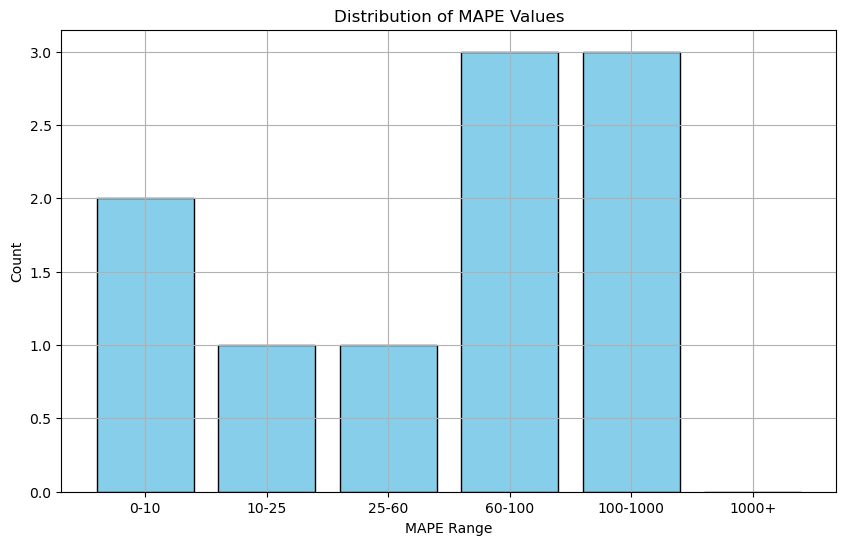

In [97]:
# Extract MAPE values from results list
mapes = [result['MAPE'] for result in results]

# Define ranges
ranges = [(0, 10), (10, 25), (25, 60), (60, 100), (100,1000), (1000, float('inf'))]

# Initialize count for each range
counts = [0] * len(ranges)

# Count the number of data points in each range
for mape in mapes:
    for i, (start, end) in enumerate(ranges):
        if start <= mape < end:
            counts[i] += 1
            break
    else:
        counts[-1] += 1  # For values above 100

# Define range labels
range_labels = ['0-10', '10-25', '25-60', '60-100', '100-1000', '1000+']

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranges)), counts, color='skyblue', edgecolor='black')
plt.xticks(range(len(ranges)), range_labels)
plt.title('Distribution of MAPE Values')
plt.xlabel('MAPE Range')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [98]:
results_df.to_excel('/Users/keremsmacbook/DataspellProjects/MultivariateForecasting/OutputData/Crypto_NBeats_V0.2.xlsx', index=False)